# Статистика, DS-поток
## Задание SP.2

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Баллы за задание:**

* Задача 1 &mdash;  20 баллов
* Задача 2 &mdash;  20 баллов
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  50 баллов
* Задача 5 &mdash;  50 баллов

**Важность задач:**

* *высокая:* задачи 2, 3, 5;
* *средне-высокая:* задача 4;
* *обычная* задача 1.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

In [1]:
# Bot check

# HW_ID: ds_sp2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

*Замечания.*
1. Вы должны помнить о разнице между оценкой / доверительным интервалом и *реализацией* оценки / доверительного интервала. На практике обычно слово *реализация* опускается.
2. Если оценка/интервал получен на лекции/семинаре, то нужно просто выписать формулу. Если такой случай не рассматривался, то нужно добавить его вывод.
3. Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

---

## Задача 1.


**1.** Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

Какие из этих оценок являются несмещенными?

**Ответ:**

Из домашки+семинара (ST2): в силу $\mathbb E \overline X = \frac{\theta}{2}$ и $\mathbb E X_{(n)} = \frac{n}{n+1} \theta$ получаем:

$X_{(n)}$: смещенная

$\frac{n+1}{n}X_{(n)}$: несмещенная

$2\overline{X}$: несмещенная

Проведите практическое исследование несмещенности перечисленных оценок аналогично ислледованию несмещенности выборочной дисперсии в предыдущих заданиях. Разбор этой задачи для выборочной дисперсии был на занятии.

**Решение:**

Функции подсчета оценок параметра

In [3]:
def X_n(sample):
    '''
    Вычисляет смещённую оценку матожидания

    :param sample: выборка значений
    :return: смещённая оценка максимума X_(n)
    '''
    return np.max(sample, axis=-1)

def unbiased_X_n(sample):
    '''
    Вычисляет несмещённую оценку матожидания

    :param sample: выборка значений
    :return: несмещённая оценка максимума
    '''
    n = sample.shape[1]
    return (n + 1) / (n) * X_n(sample)

def unbiased_mean(sample):
    '''
    Вычисляет несмещённую оценку матожидания

    :param sample: выборка значений
    :return: несмещённая оценка удвоенной средней
    '''
    return 2 * np.mean(sample, axis=-1)

Зададим список оценок и разные параметры для отрисовки графика

In [4]:
estimators = [
    (X_n, "$X_{(n)}$", "red", 0.0),
    (unbiased_X_n, "$\\frac{n+1}{n}X_{(n)}$", "green", 0.1),
    (unbiased_mean, "$2 \\overline{X}$", "blue", 0.2)
]

Напишем функцию, которая для каждой оценки визуализирует разброс реализаций оценки и ее среднее значение.

In [5]:
def est_plot(distribution, estimators, sample_size, sample_count):  
    '''
    Построение графика разброса реализаций оценок и их средних значений.
    
    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    sample_size -- размер выборок
    sample_count -- количество генерируемых выборок
    '''    

    X = distribution.rvs(size=(sample_count, sample_size))
    
    plt.figure(figsize=(18, 0.7 * len(estimators)))
    for estimator, name, color, y in estimators:
        E = estimator(X)

        plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                    s=100, color=color, label=name)
        plt.scatter(E.mean(), y, marker='*', s=300,
                    color='w', edgecolors='black')

    plt.vlines(1, -1, 1, color='r')
    plt.title('Размер выборки = %d' % sample_size)
    plt.yticks([])
    plt.legend()
    plt.xlim((0.6, 1.4))
    plt.ylim((-0.1, 0.1 * len(estimators)))


Вызываем функцию для разных размеров выборок

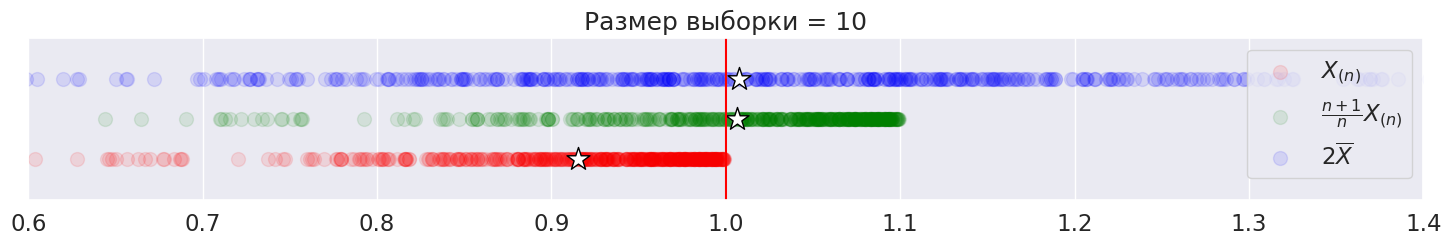

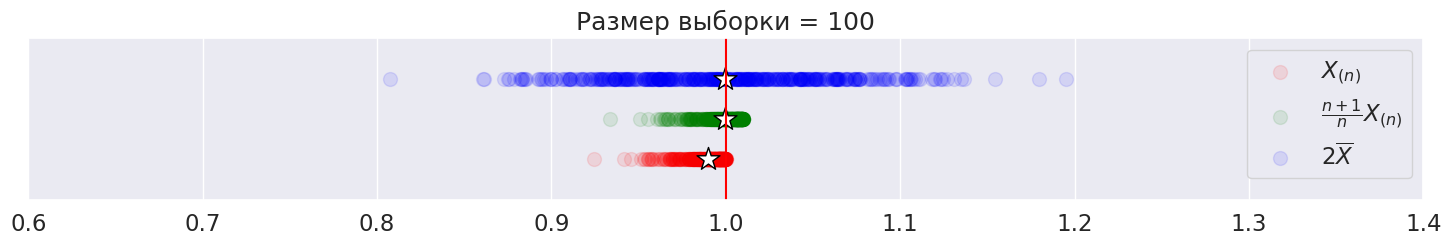

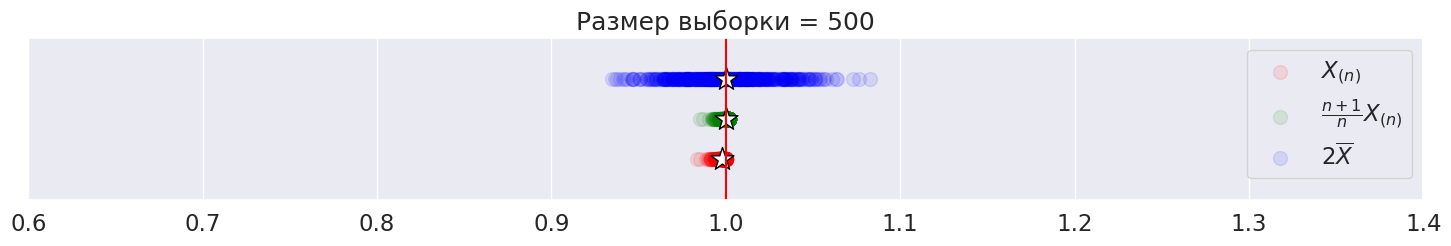

In [6]:
sample_size_list = (10, 100, 500)
sample_count = 500

for sample_size in sample_size_list:
    est_plot(sps.uniform(0, 1), estimators, sample_size, sample_count)

**Вывод:** 
Как видно, две оценки действительно несмещенные - при многократном повторении эксперимента средние значения несмещенных оценок равны значению параметра. При этом для третьей оценки только при большом размере выборки ее среднее будет близко к параметру, то есть она асимптотически несмещенная.

Ясно, что с ростом размера выборки растет и точность оценок параметра. Заметим, что $\frac{n+1}{n} X_{(n)}$ выигрывает в скорости схождении к параметру по сравнению с $2 \overline X$.

---
## Задача 2.

Пусть $X_1, \ldots, X_n$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, причем $a$ не известно. Визуализируйте свойства состоятельности и асимптотической нормальности для оценки $S^2 = \overline{X^2} - \overline{X}^2$ дисперсии $\sigma^2$.

Примеры кода можно посмотреть в материалах лекций. Обязательно на графике оценок визуализируйте границы, которые задает свойство асимптотической нормальности.

**Решение:**

Подсчет выборки:

In [7]:
sigma_squared = 1  # истинное значение параметра
size = 300  # размер выборок
samples_count = 500  # количество выборок
n_range = (np.arange(size) + 1)  # размеры подвыборок

# генерируем множество выборок, 
# параметр theta является обратным к параметру масштаба
samples = sps.norm(loc=0, scale=sigma_squared).rvs(size=(samples_count, size))
# вычисляем оценки в зависимости от размера выборки, 
# усредняем по последней оси
estimation = (samples ** 2).cumsum(axis=1) / n_range - (samples.cumsum(axis=1) / n_range) ** 2


Построение графика:

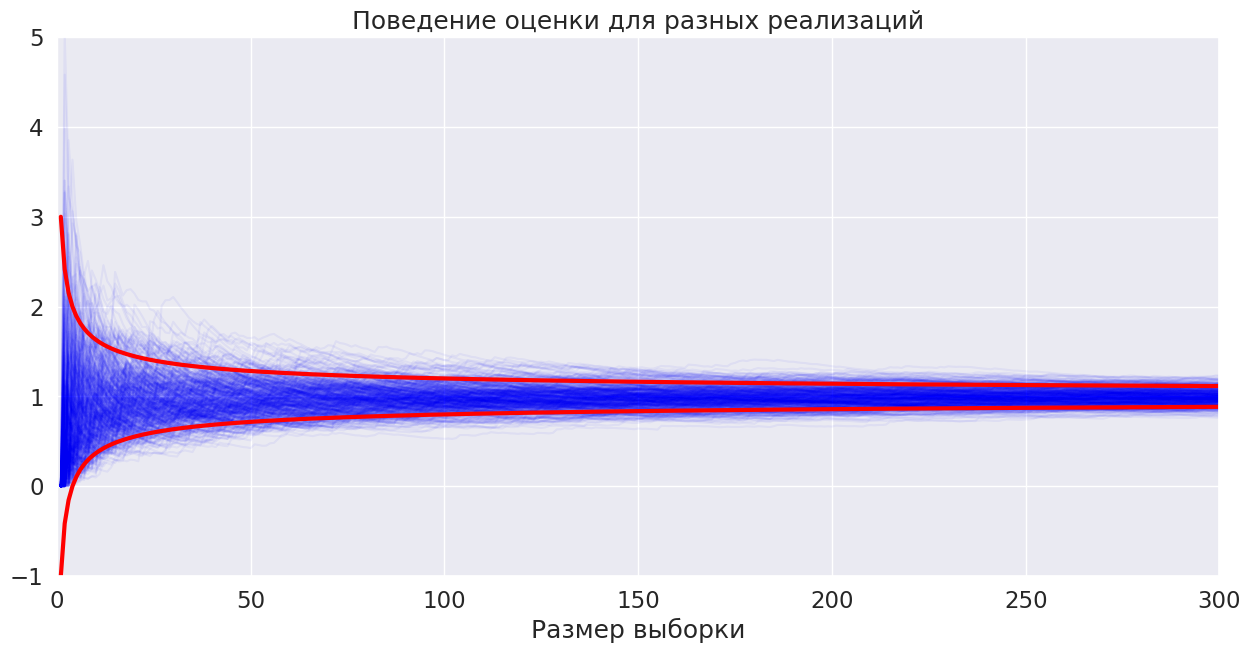

In [8]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, estimation[i], color='blue', alpha=0.05)
plt.plot(n_range, sigma_squared + 2 * sigma_squared / np.sqrt(n_range), color='red', lw=3, label='Границы нормальности (верхняя)')
plt.plot(n_range, sigma_squared - 2 * sigma_squared / np.sqrt(n_range), color='red', lw=3, label='Границы нормальности (нижняя)')
plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.ylim((-1, 5))
plt.xlim((0, size));

**Вывод:** 

Чем больше выборка, тем точнее оценка параметра, значит оценка ассимптотически нормальная

С вероятностью ~0.95 при больших выборках значение оценки отклоняется от истинного значения параметра не более чем на $2 \theta/ \sqrt n$. Так как линии лежат внутри таких красных границ, то это правило выполняется.

---
## Задача 3.

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, причем $a$ не известно. Визуализируйте асимптотический доверительный интервал Вальда для параметра дисперсии при росте размера выборки.

Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $\alpha=0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную выше функцию. На график также нужно нанести точки выборки.

Чтобы не плодить код, напишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

На лекции было, что $\frac{nS^2}{\sigma^2}$ сходится по распределению к $\chi^2_{n-1}$

И была выведена формула для доверительного интервала $\sigma$ с уровнем доверия $\alpha$: 

$$\sigma \in \left( \sqrt{\frac{nS^2}{\chi^2_{n-1, (1+\alpha)/2}}}, \sqrt{\frac{nS^2}{\chi^2_{n-1, (1+\alpha)/2}}}\right)$$

Значит

$$\sigma^2 \in \left( {\frac{nS^2}{\chi^2_{n-1, (1+\alpha)/2}}}, {\frac{nS^2}{\chi^2_{n-1, (1+\alpha)/2}}}\right)$$

Так что это будет и ассимптотическим доверительным интервалом


**Решение:**

Функция построения графиков:

In [9]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None,
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66',
    color_sample='#0066FF', label_estimation='Оценка'
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''
    
    n = len(left)
    plt.axhline(sigma2, color='black', linestyle='--', label='Истинное значение дисперсии')
    plt.fill_between(range(1, n+1), left, right, color=color_interval, alpha=0.3, label='Доверительный интервал')
    
    if estimation is not None:
        plt.plot(range(1, n+1), estimation, color=color_estimation, label=label_estimation)

    i = 1
    plt.scatter([i] * i, sample[:i], color=color_sample, alpha=0.3, s = 1, label='Точка выборки')
    for i in range(2, n+1):
        plt.scatter([i] * i, sample[:i], color=color_sample, alpha=0.3, s = 1)#, label='Выборка', s=10)

    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.ylabel('Оценка дисперсии')
    plt.title('А.Д.И. Вальда для оценки дисперсии $\\sigma^2$')
    plt.legend()
    plt.grid(True)
    plt.show()

Само построение выборки:

In [10]:
N = 100
N_range =  np.arange(1, N + 1)
alpha = 0.95
a = 0
sigma_squared = 1

samples = sps.norm(loc=a, scale=np.sqrt(sigma_squared)).rvs(size=N)

sample_means = np.cumsum(samples) / N_range
sample_var = (np.cumsum(samples**2) / N_range) - sample_means**2

chi2_upper = sps.chi2.ppf((1 - alpha) / 2, df=N_range - 1)
chi2_lower = sps.chi2.ppf((1 + alpha) / 2, df=N_range - 1)

left = (N_range * sample_var) / chi2_upper
right = (N_range * sample_var) / chi2_lower

plt.figure(figsize=(12, 8))
draw_confidence_interval(left, right, estimation=sample_var,
                         sample=samples, ylim=(-4, 4))

NameError: name 'sigma2' is not defined

<Figure size 1200x800 with 0 Axes>

**Вывод:** Границы доверительного интервала покрывают оценку и в нее попадает истинное значение дисперсии. Чем больше выборка, тем точнее границы, то рост их точности нелинейный, для увеличения точности в 2 раза не достаточно в 2 раза увеличить выборку.

Точки выборки имеют нормальное распределение, это тоже видно из графика.

_________________
## Задача 4.
Аналогично задаче 3 сгенерируйте выборку $X_1, ... X_{100}$ из распределения $\Gamma(3, 2)$ и постройте доверительные интервалы для следующих случаев:

* точный асимптотический доверительный интервал в параметрической модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно;
* точный асимптотический доверительный интервал для $\theta$ в параметрической модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки наносить на график не нужно.

Построение графиков:

In [ ]:
def draw_confidence_interval_no_sample(
    left, right, estimation=None, ylim=(0, 6),
    color_interval='#00CC66', color_estimation='#FF3300', label=None, alpha=0.3
):
    '''
    Рисует доверительный интервал и оценки параметра.

    :param left: левые границы интервалов
    :param right: правые границы интервалов
    :param estimation: оценки параметра
    :param ylim: ограничение вертикальной оси
    :param color_interval: цвет интервала
    :param color_estimation: цвет оценок
    :param label: подпись для интервала
    :param alpha: прозрачность заливки интервала
    '''
    n = len(left)
    plt.fill_between(range(1, n+1), left, right, color=color_interval, alpha=alpha, label=label)
    
    if estimation is not None:
        plt.plot(range(1, n+1), estimation, color=color_estimation, linewidth=2)
    
    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.ylabel('Оценка параметра')
    plt.grid(True)
    plt.legend()


Сама генерация выборки:

In [ ]:
N = 100
N_range =  np.arange(1, N + 1)
alpha = 0.95
z = sps.norm.ppf((1 + alpha) / 2)

theta_true = 3
beta_true = 2

samples = sps.gamma.rvs(a=beta_true, scale=1 / theta_true, size=N)


sample_means = np.cumsum(samples) / N_range

# Если beta известно
theta_hat_known_beta = beta_true / sample_means
left_known_beta = theta_hat_known_beta - z * np.sqrt(beta_true) / (np.sqrt(N_range) * sample_means)
right_known_beta = theta_hat_known_beta + z * np.sqrt(beta_true) / (np.sqrt(N_range) * sample_means)

# Если beta неизвестно
sample_var = np.cumsum((samples - sample_means) ** 2)
Y = sample_means ** 2 / (sample_var / N_range) 

theta_hat_unknown_beta = Y / sample_means
left_unknown_beta = theta_hat_unknown_beta - z * np.sqrt(Y) / (np.sqrt(N_range) * sample_means)
right_unknown_beta = theta_hat_unknown_beta + z * np.sqrt(Y) / (np.sqrt(N_range) * sample_means)


# Построение графика
plt.figure(figsize=(10, 6))
draw_confidence_interval_no_sample(left_known_beta, right_known_beta,
                                   theta_hat_known_beta, color_interval='blue',
                                   color_estimation='blue', label='Известное $\\beta$',
                                   alpha=0.3)
draw_confidence_interval_no_sample(left_unknown_beta, right_unknown_beta,
                                   theta_hat_unknown_beta, color_interval='green',
                                   color_estimation='green', label='Неизвестное $\\beta$',
                                   alpha=0.3)

plt.axhline(theta_true, color='black', linestyle='--', label='Истинное значение $\\theta$')
plt.legend()
plt.title('Д.И. для оценки $\\theta$ в Гамма-распределении')
plt.show()


Сравните полученные интервалы и поясните наблюдаемый эффект.

**Вывод:** Ожидаемо, что при известном $\beta$ мы можем дать более точный доверительный интервал. Они различаются тем, что при известном $\beta$ сходимость быстрее, чем если его не знаем. Сами длины Д.И. примерно такие же для обоих способов.

___
## Задача 5.

Пусть случайная величина $X$ имеет нормальное распределение с параметрами $(a, \sigma^2)$, то есть:
$$
X \sim \mathcal{N}(a, \sigma^2)
$$
Рассмотрим следующую задачу оптимизации:
$$
f(X) = (\mathsf{E}X-1)^2 + (\mathsf{D}X - 1)^2 \longrightarrow \min_{a, \sigma^2}
$$
В данном случае правильный ответ мы можем легко найти непосредственно, однако в реальности возникают гораздо более сложные функции, и решить задачу напрямую руками не представляется возможным. Для решения таких задач применяются различные градиентные методы, такие как, например, стохастический градиентный спуск. Оказывается, что в нём критически важно использовать несмещенные оценки градиента.

*Замечание.* Если смещение заключается только в том, что математическое ожидание оценки отличается от вектора градиента домножением каждой компоненты на одну и ту же константу, то проблем нет &mdash; все равно мы используем шаг градиента.

В данной задаче вам предлагается на примере простой функции убедиться, насколько важным оказывается использовать несмещенные оценки в итерационных процедурах.

**Решение:**

Запишите оптимальные значения параметров $a$ и $\sigma^2$, а также шаг простого градиентного спуска для минимизаци определенной выше функции $f(X)$:

$$f(X) = (\mathsf{E}X-1)^2 + (\mathsf{D}X - 1)^2 = (a - 1)^2 + (\sigma^2 - 1)^2$$
Минимум когда каждая из скобок нулевая, то есть $a = 1$ и $\sigma = 1$

$$\frac{\partial f}{\partial a} = 2(a-1), \frac{\partial f}{\partial \sigma^2} = 2(\sigma^2-1)$$

Откуда градиент $\left( 2(a-1), 2(\sigma^2 -1) \right)$

Шаг:

$$a_{t + 1} = a_t - 2\eta(a-1) \qquad a_{t + 1} = a_t - 2\eta(\sigma^2-1)$$

Реализуйте метод простого градиентного спуска для выше описанной задачи оптимизации. Для каждой итерации сохраните текущие значения среднего и дисперсии, постройте график зависимости значений $a$ и $\sigma^2$ от шага процедуры. Наблюдается ли сходимость к оптимальным параметрам?

Сам градиентный спуск:

In [ ]:
eta = 0.1  # learning_rate
iterations = 100 

a_init = 0.0
sigma2_init = 0.0

a_values = []
sigma2_values = []

a = a_init
sigma2 = sigma2_init

for _ in range(iterations):
    a_values.append(a)
    sigma2_values.append(sigma2)
    
    grad_a = 2 * (a - 1)
    grad_sigma2 = 2 * (sigma2 - 1)
    
    a = a - eta * grad_a
    sigma2 = sigma2 - eta * grad_sigma2

И графики:

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(a_values, marker='o')
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('Итерация')
plt.ylabel('Значение $a$')
plt.title('Зависимость $a$ от итерации')

plt.subplot(1, 2, 2)
plt.plot(sigma2_values, marker='o')
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('Итерация')
plt.ylabel('Значение $\\sigma^2$')
plt.title('Зависимость $\\sigma^2$ от итерации')

plt.tight_layout()
plt.show()

**Вывод:** 
Как видно, сходимость к оптимальным параметрам есть, причем довольно быстрая (достаточно 20 шагов)

Теперь предположим, что мы хотим оценить градиент стохастически. Например, давайте текущие значения среднего и дисперсии оценивать изученным ранее методом Монте-Карло. А именно, каждый раз мы будем генерировать выборку размера 5 из нормального распределения с текущими значениями параметров и далее по ней оценивать градиент.
Для оценки математического ожидания ипользуйте несмещенную оценку, а для дисперсии &mdash; смещенную.

Реализуйте описанный выше подход. Как и прежде, изобразите текущие значения параметров в зависимости от итерации. Сошлась ли такая процедура к оптимальным значениям?

Сам градиентный спуск:

In [ ]:
eta = 0.001
iterations = 5000
sample_size = 5

a_init = 0.0
sigma2_init = 0.0

a_values = []
sigma2_values = []

a = a_init
sigma2 = sigma2_init

for _ in range(iterations):
    samples = np.random.normal(a, np.sqrt(sigma2), sample_size)
    
    mean_est = np.mean(samples) # несмещенная оценка
    variance_est = np.mean((samples - mean_est)**2) # смещенная оценка
    
    grad_a = 2 * (mean_est - 1)
    grad_sigma2 = 2 * (variance_est - 1)
    
    a = a - eta * grad_a
    sigma2 = sigma2 - eta * grad_sigma2
    
    a_values.append(a)
    sigma2_values.append(sigma2)

И построение графиков:

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(a_values, linewidth = 1)
plt.axhline(y=1, color='r')
plt.xlabel('Итерация')
plt.ylabel('Значение $a$')
plt.title('Зависимость $a$ от итерации')

plt.subplot(1, 2, 2)
plt.plot(sigma2_values, linewidth = 1)
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('Итерация')
plt.ylabel('Значение $\\sigma^2$')
plt.title('Зависимость $\\sigma^2$ от итерации')

plt.tight_layout()
plt.show()

Как видно сходимость есть, но только для несмещенной оценки. Что и ожидаемо, потому что для смещенной оценки градиент будет тоже смещен 

Теперь изменим нашу процедуру, взяв несмещенную оценку для дисперсии. Обратите внимание на параметр `ddof` в функции `np.var`. Поменялся ли результат?

Сам градиентный спуск:

In [ ]:
eta = 0.001
iterations = 5000
sample_size = 5

a_init = 0.0
sigma2_init = 0.0

a_values = []
sigma2_values = []

a = a_init
sigma2 = sigma2_init

for _ in range(iterations):
    samples = np.random.normal(a, np.sqrt(sigma2), sample_size)
    
    mean_est = np.mean(samples) # несмещенная оценка
    variance_est = np.var(samples, ddof=1) # несмещенная оценка
    
    grad_a = 2 * (mean_est - 1)
    grad_sigma2 = 2 * (variance_est - 1)
    
    a = a - eta * grad_a
    sigma2 = sigma2 - eta * grad_sigma2
    
    a_values.append(a)
    sigma2_values.append(sigma2)

И построение графиков

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(a_values, linewidth = 1)
plt.axhline(y=1, color='r')
plt.xlabel('Итерация')
plt.ylabel('Значение $a$')
plt.title('Зависимость $a$ от итерации')

plt.subplot(1, 2, 2)
plt.plot(sigma2_values, linewidth = 1)
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('Итерация')
plt.ylabel('Значение $\\sigma^2$')
plt.title('Зависимость $\\sigma^2$ от итерации')

plt.tight_layout()
plt.show()

**Вывод по пункту:** теперь сходимость оценки дисперсии к истинному минимому тоже есть!

**Вывод по задаче:**

1) Оба метода в итоге сошлись к оптимальным значениям параметра

2) Аналитический градиентный спуск сходится быстрее. При этом стохастический, в свою очередь, может быть полезен в более сложных задачах, где аналитическое вычисление градиентов невозможно, но он требует аккуратного использования оценок параметров, и важна их несмещенность

3) Предпочтительнее использовать несмещенные оценки параметров вместо смещенных.